# Pandas (part 3)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

C:\Users\duyph\AppData\Local\Temp\ipykernel_16196\2623981112.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


## 5. Reshape data

### 5.1. Long vs. Wide data

In [3]:
# Load data
data_path = 'C:\\Users\\duyph\\Documents\\DAP2308R1\\data\\'
long_data_name = 'long_data.csv'
wide_data_name = 'wide_data.csv'

long_df = pd.read_csv(data_path + long_data_name)
wide_df = pd.read_csv(data_path + wide_data_name)

In [4]:
# View long data
long_df.head(5)

,attributes,datatype,date,station,value
0,",,H,0700",TMAX,2018-10-01T00:00:00,GHCND:USC00280907,21.1
1,",,H,0700",TMIN,2018-10-01T00:00:00,GHCND:USC00280907,8.9
2,",,H,0700",TOBS,2018-10-01T00:00:00,GHCND:USC00280907,13.9
3,",,H,0700",TMAX,2018-10-02T00:00:00,GHCND:USC00280907,23.9
4,",,H,0700",TMIN,2018-10-02T00:00:00,GHCND:USC00280907,13.9


In [5]:
# View wide data
wide_df.head(5)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9


### 5.2. Đổi từ long -> wide

In [9]:
# Preview
long_df.head(3)

,attributes,datatype,date,station,value
0,",,H,0700",TMAX,2018-10-01T00:00:00,GHCND:USC00280907,21.1
1,",,H,0700",TMIN,2018-10-01T00:00:00,GHCND:USC00280907,8.9
2,",,H,0700",TOBS,2018-10-01T00:00:00,GHCND:USC00280907,13.9


In [10]:
# Unique value của cột datatype
long_df["datatype"].unique().tolist()

['TMAX', 'TMIN', 'TOBS']

In [13]:
# Pivot cột datatype thành 3 cột ứng với unique value
# Mỗi dòng là 1 ngày, mỗi cell có giá trị lấy từ cột value
long_df.pivot(index="date", columns="datatype", values="value").head(3).reset_index()

datatype,date,TMAX,TMIN,TOBS
0,2018-10-01T00:00:00,21.1,8.9,13.9
1,2018-10-02T00:00:00,23.9,13.9,17.2
2,2018-10-03T00:00:00,25.0,15.6,16.1


### 5.3. Đổi từ wide sang long

In [14]:
# Preview
wide_df.head(3)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1


In [15]:
# Gom 3 cột TMAX, TMIN, TOBS thành 1 cột tên `temp_type`
# Các giá trị mỗi cell gom thành 1 cột khác tên `temp_value`
# Mỗi ngày bây giờ có 3 hàng ứng với 3 loại TMAX, TMIN, TOBS
wide_df.melt(
        id_vars=["date"],
        value_vars=["TMAX", "TMIN", "TOBS"],
        var_name="temp_type",
        value_name="temp_value"
    )\
    .head(3)

,date,temp_type,temp_value
0,2018-10-01,TMAX,21.1
1,2018-10-02,TMAX,23.9
2,2018-10-03,TMAX,25.0


### 5.4. Plotting using long vs. wide data

#### A) Wide

In [16]:
# Preview
wide_df.head(3)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1


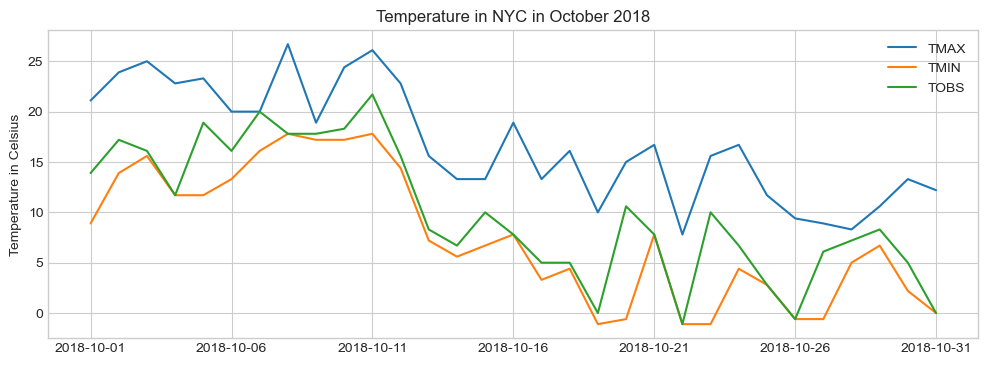

In [17]:
# Plot
fig, ax = plt.subplots(figsize=(12, 4))

wide_df.plot.line(
    x="date", 
    y=["TMAX", "TMIN", "TOBS"],
    ax=ax
)

ax.set_title("Temperature in NYC in October 2018")
ax.set_xlabel(None)
ax.set_ylabel('Temperature in Celsius')

plt.show()

#### B) Long

In [18]:
# Convert date to date time
long_df["date"] = pd.to_datetime(long_df["date"])
long_df.head(3)

,attributes,datatype,date,station,value
0,",,H,0700",TMAX,2018-10-01,GHCND:USC00280907,21.1
1,",,H,0700",TMIN,2018-10-01,GHCND:USC00280907,8.9
2,",,H,0700",TOBS,2018-10-01,GHCND:USC00280907,13.9


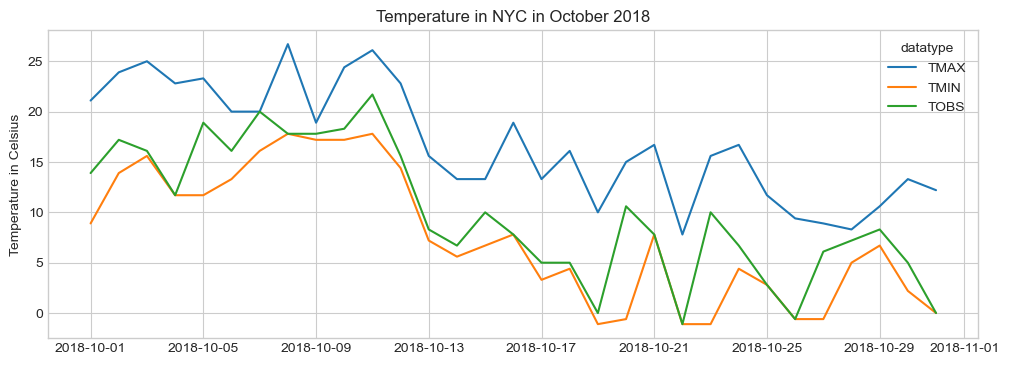

In [19]:
# Plot
fig, ax = plt.subplots(figsize=(12, 4))

sns.lineplot(
    x="date", 
    y="value",
    hue="datatype",
    data=long_df,
    ax=ax
)

ax.set_title("Temperature in NYC in October 2018")
ax.set_xlabel(None)
ax.set_ylabel('Temperature in Celsius')

plt.show()

## 6. Concatenate DFs

### 6.1. Vertically

#### Tạo data

In [20]:
df1 = pd.DataFrame({
    "name": ["Mr. A", "Mr. B", "Ms. C"],
    "age": [30, 25, 32],
    "salary": [1200, 2000, 1700],
    "source": "data file 1"
})

df1

,name,age,salary,source
0,Mr. A,30,1200,data file 1
1,Mr. B,25,2000,data file 1
2,Ms. C,32,1700,data file 1


In [21]:
df2 = pd.DataFrame({
    "name": ["Ms. X", "Mr. Y"],
    "age": [35, 42],
    "salary": [2300, 1200],
    "source": "data file 2"
})

df2

,name,age,salary,source
0,Ms. X,35,2300,data file 2
1,Mr. Y,42,1200,data file 2


In [32]:
df3 = pd.DataFrame({
    "name": ["Mr. E", "Mr. F", "Ms. G"],
    "age": [30, 25, 32],
    "salary": [1200, 2000, 1700]
})
df3

,name,age,salary
0,Mr. E,30,1200
1,Mr. F,25,2000
2,Ms. G,32,1700


#### Concatenate

In [33]:
pd.concat([df1, df2, df3], ignore_index=True)

,name,age,salary,city,district
0,Mr. A,30.0,1200.0,NaN,NaN
1,Mr. B,25.0,2000.0,NaN,NaN
2,Ms. C,32.0,1700.0,NaN,NaN
3,NaN,NaN,NaN,HN,Hoan Kiem
4,NaN,NaN,NaN,HCM,Q1
5,Mr. E,30.0,1200.0,NaN,NaN
6,Mr. F,25.0,2000.0,NaN,NaN
7,Ms. G,32.0,1700.0,NaN,NaN


### 6.2. Horizontally
(Ít gặp)

#### Tạo data

In [23]:
df1 = pd.DataFrame({
    "name": ["Mr. A", "Mr. B", "Ms. C"],
    "age": [30, 25, 32],
    "salary": [1200, 2000, 1700]
})

df1

,name,age,salary
0,Mr. A,30,1200
1,Mr. B,25,2000
2,Ms. C,32,1700


In [24]:
df2 = pd.DataFrame({
    "city": ["HN", "HCM"],
    "district": ["Hoan Kiem", "Q1"]
})

df2

,city,district
0,HN,Hoan Kiem
1,HCM,Q1


,name,age,salary
0,Mr. E,30,1200
1,Mr. F,25,2000
2,Ms. G,32,1700


In [31]:
pd.concat([df1, df2, df3], ignore_index=True)

,name,age,salary,city,district
0,Mr. A,30.0,1200.0,NaN,NaN
1,Mr. B,25.0,2000.0,NaN,NaN
2,Ms. C,32.0,1700.0,NaN,NaN
3,NaN,NaN,NaN,HN,Hoan Kiem
4,NaN,NaN,NaN,HCM,Q1
5,Mr. E,30.0,1200.0,NaN,NaN
6,Mr. F,25.0,2000.0,NaN,NaN
7,Ms. G,32.0,1700.0,NaN,NaN


## 7. Join / Merge DFs by columns

### 7.1. Minh họa
![](https://d33wubrfki0l68.cloudfront.net/108c0749d084c03103f8e1e8276c20e06357b124/5f113/diagrams/join-setup.png)

![](https://d33wubrfki0l68.cloudfront.net/820b012580731f2134f90ee9c6388994c2343683/27703/diagrams/join-setup2.png)

#### A) Inner
![](https://d33wubrfki0l68.cloudfront.net/3abea0b730526c3f053a3838953c35a0ccbe8980/7f29b/diagrams/join-inner.png)

#### B) Outer (left / right / full)
![](https://d33wubrfki0l68.cloudfront.net/9c12ca9e12ed26a7c5d2aa08e36d2ac4fb593f1e/79980/diagrams/join-outer.png)

#### C) Ven diagrams
![](https://d33wubrfki0l68.cloudfront.net/aeab386461820b029b7e7606ccff1286f623bae1/ef0d4/diagrams/join-venn.png)

### 7.2. Merge data with pandas

In [ ]:
df1 = pd.DataFrame({
    "id": [1, 2, 3],
    "name": ["John", "Mary", "Louis"]
})

df2 = pd.DataFrame({
    "id": [1, 2, 4],
    "country": ["US", "CA", "FR"]
})

display(df1)
display(df2)

In [ ]:
# Inner join
pd.merge(left = df1, right = df2, how="inner", on=["id"])

In [ ]:
# Left (outer) join
pd.merge(df1, df2, how="left", on=["id"])

In [ ]:
# Right (outer) join
pd.merge(df1, df2, how="right", on=["id"])

In [ ]:
# Full (outer) join
pd.merge(df1, df2, how="outer", on=["id"])

## 8. Dirty data

### 8.1. Load data

In [ ]:
dirty_data_name = 'dirty_data.csv'

df = pd.read_csv(data_path + dirty_data_name)
df.head(3)

### 8.2. Find and replace

In [ ]:
# Replace "?" hoặc "" bằng NaN
df.replace(to_replace=["?", ""], value=np.nan, inplace=True)
df.head(3)

In [ ]:
# Replace inf với 0
df.replace(to_replace=[-np.infty, np.infty], value=0, inplace=True)
df.head(3)

In [ ]:
# Replace NaN của 
df.replace(to_replace=[-np.infty, np.infty], value=0, inplace=True)
df.head(3)

### 8.3. Fill NA

In [ ]:
# Fill NaN của cột WESF bằng "Unknown", NaN của cột TOBS bằng 0
df.fillna({"WESF": "Unknown", "TOBS": 0}, inplace=True)
df.head(3)

### 8.4. Drop NA

In [ ]:
# Tạo data
df = pd.DataFrame({
    "c1": [1, 2, np.nan, np.nan],
    "c2": ["A", "B", "C", np.nan],
    "c3": [1.5, np.nan, 3, np.nan]
})

df

In [ ]:
# Drop những dòng mà có ít nhất 1 cell có NaN
# Muốn lưu thay đổi set inplace=True
df.dropna()

In [ ]:
# Drop những dòng mà tất cả các cell đều là NaN
# Muốn lưu thay đổi set inplace=True
df.dropna(how="all")

In [ ]:
# Drop những dòng ứng với cột c3 là NaN
# Muốn lưu thay đổi set inplace=True
df.dropna(subset=["c3"])

## 9. Dummy variables

### 9.1. VD 1

In [ ]:
# Tạo data
df = pd.DataFrame({
    'id': range(1, 5),
    'sex': ['male', 'male', 'female', 'male'],
    'age': [18, 19, 22, 15]

})

df

In [ ]:
# Get dummies
pd.get_dummies(df["sex"])

In [ ]:
# Get dummies with prefix
pd.get_dummies(df["sex"], prefix="is")

In [ ]:
# Get dummies drop first
sex_dummies = pd.get_dummies(df["sex"], prefix="is", drop_first=True)
sex_dummies

In [ ]:
# Combine với orginal data dùng concat
pd.concat([df, sex_dummies], axis=1)

In [ ]:
# Combine với orginal data dùng join
df.join(sex_dummies)

In [ ]:
# Combine với orginal data, bỏ đi cột sex vì không cần thiết
df.join(sex_dummies).drop(columns=["sex"])

### 9.2. VD 2

In [ ]:
# Tạo data
df = pd.DataFrame({
    'id': range(1, 8),
    'sex': ['male', 'male', 'female', 'male', 'male', 'female', 'male'],
    'ranking': ["Excellent", "Excellent", "Good", "Avg", "Avg", "Failed", "Failed"]
})

df

In [ ]:
# Tạo dummies
ranking_dummies = pd.get_dummies(df["ranking"], prefix="is", drop_first=True)
sex_dummies = pd.get_dummies(df["sex"], prefix="is", drop_first=True)

In [ ]:
# View dummies
display(ranking_dummies.head(2))
display(sex_dummies.head(2))

In [ ]:
# Join với data ban đầu
df\
    .join(sex_dummies)\
    .join(ranking_dummies)\
    .drop(columns=["sex", "ranking"])